In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.5MB/s 
     |████████████████████████████████| 9.5MB 16.0MB/s 
     |████████████████████████████████| 2.1MB 54.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2003년 11월     63.476855
2003년 12월     63.020628
2004년 01월     62.850748
2004년 02월     63.102766
2004년 03월     63.365559
                ...    
2020년 09월    110.419274
2020년 10월    110.596536
2020년 11월    110.781950
2020년 12월    111.071607
2021년 01월    111.511358
Name: 0, Length: 207, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


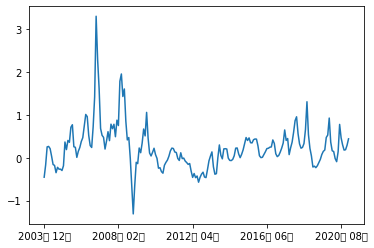

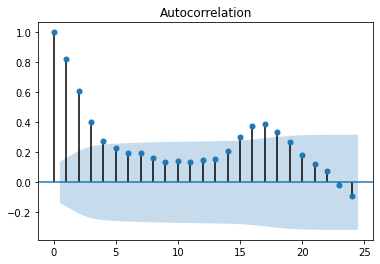

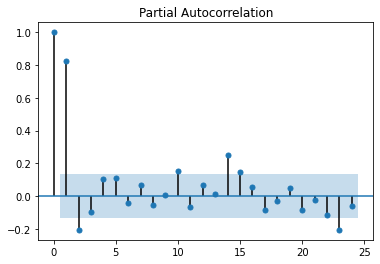

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

op_buy1 = pd.read_csv('/content/drive/MyDrive/house_price/op_buy1.csv')
op_buy2 = pd.read_csv('/content/drive/MyDrive/house_price/op_buy2.csv')
money = pd.read_csv('/content/drive/MyDrive/house_price/money.csv')
house_buy = pd.read_csv('/content/drive/MyDrive/house_price/house_buy.csv')

op1=pd.concat([op_buy1.iloc[9:,0],op_buy1.iloc[9:,[i for i in range(2,122) if i%4==2]]],axis=1)
op2=pd.concat([op_buy2.iloc[[i for i in range(17,65,2) ],0],op_buy2.iloc[[i for i in range(17,65,2)],[i for i in range(2,30) if i%4==2]]],axis=1)
op1.index = [i for i in range(24)]
op2.index=[i for i in range(24)]
op_buy = pd.concat([op1,op2],axis=1) # 오피스텔 매매가격

#money0 = money.iloc[0,2:-1]


house_buy0 = house_buy.iloc[0,1:-1].astype(np.float)
#date = house_buy.columns[1:]


print(house_buy0)

#plot_acf(house_buy0)
#plot_pacf(house_buy0)

diff_1=house_buy0.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

#house_buy0.plot()
#plt.show()
#money0.plot()
#plt.show()


#del op_buy2.iloc[:,4]
#op_buy.head()
#op_buy.loc[1]
#print(op_buy.loc[1:5,'규모'])

#print(op_buy2)
    #print(op_buy[i,'2020년 06월':])

In [ ]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(house_buy0,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(house_buy0)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=311.246, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=169.021, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=102.394, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=80.498, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.193, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=75.150, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=69.878, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=71.688, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=72.780, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=73.761, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=71.780, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=72.332, Time=0.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=72.484, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=73.790, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=68.687, Time=0.46 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0] 

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(house_buy0, order=(2,1,1))
#model_fit = model.fit(disp=0)
model_fit = model.fit(trend='c',full_output=True, disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  206
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -31.880
Method:                       css-mle   S.D. of innovations              0.282
Date:                Thu, 18 Mar 2021   AIC                             73.761
Time:                        18:18:56   BIC                             90.400
Sample:                             1   HQIC                            80.490
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2269      0.086      2.636      0.008       0.058       0.396
ar.L1.D.y      1.1997      0.187      6.426      0.000       0.834       1.566
ar.L2.D.y     -0.3789      0.156     -2.435      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


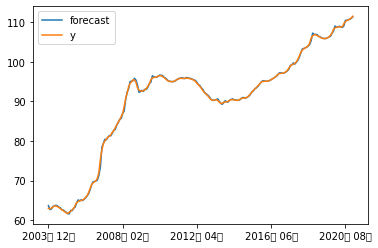

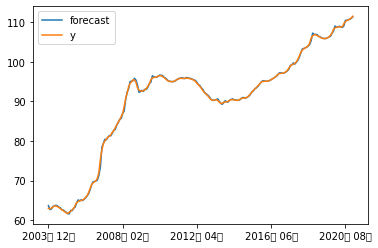

In [ ]:
model_fit.plot_predict()

In [ ]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([111.94057441]), array([0.28161944]), array([[111.38861046, 112.49253836]]))
